

# Project: Gun Trend for All States 




  

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


Gun topics always are the trend to investigate or explore. Gun is a dangerous subject which it can hurt people and protect people. To insured the citizen's safety, FBI had a system call NICS (National Instant Criminal Background Check System) to record the gun data purchase and registration. The NICS can be used to determine if the buyer is eligible to buy firearms or explosives item. The firearm shops have access to pull out data from NICS and use the data to determined the eligibility for the buyer. The dataset contains numerical datas that revalent to the gun purchase and registration with state level. The first question in this project is which state had the highest overall gun registration/Permit. the second question is which types of gun is more popular.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import array as arr
import matplotlib.pyplot as plt
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('gun_data.csv')
# replace 0 into NaN value
df.replace(to_replace=0,value=np.nan, inplace=True)
# To get the name of states
list_state=df.state.unique()
# to print out few line for checking
df.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,NaN,5734.0,6320.0,221.0,317.0,NaN,15.0,...,NaN,NaN,NaN,9.0,16.0,3.0,NaN,NaN,3.0,32019.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,NaN,5.0,...,NaN,NaN,NaN,17.0,24.0,1.0,NaN,NaN,NaN,6303.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,NaN,13.0,...,NaN,NaN,NaN,38.0,12.0,2.0,NaN,NaN,NaN,28394.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,...,NaN,NaN,NaN,13.0,23.0,NaN,NaN,2.0,1.0,17747.0
4,2017-09,California,57839.0,NaN,37165.0,24581.0,2984.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123506.0
5,2017-09,Colorado,4356.0,NaN,15751.0,13448.0,1007.0,1062.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35873.0
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12117.0
7,2017-09,Delaware,275.0,NaN,1414.0,1538.0,66.0,68.0,NaN,NaN,...,NaN,NaN,NaN,55.0,34.0,3.0,1.0,2.0,NaN,3502.0
8,2017-09,District of Columbia,1.0,NaN,56.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0
9,2017-09,Florida,10784.0,NaN,39199.0,17949.0,2319.0,1721.0,1.0,18.0,...,NaN,NaN,NaN,11.0,9.0,NaN,NaN,1.0,NaN,77390.0



### Data Cleaning (Replace this with more specific notes!)

In this section, data cleaning is perform. First, I convert the value 0 into NaN vlaue. Next, I used while loop to calculate the mean for each state and replace NaN value with the mean. Then, the data still contain some NaN due to the certain state doesn't have a value at all so I replace NaN with value 0. Last, I use round function to round the data into 0 decimal place.

In [4]:

# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# replacing NaN value with mean value
i=0
# Using while loop to get the mean for each state and replace NaN value with the mean value
while i < 55:
    test_na=list_state[i]
    state_calculate=df[df.state==test_na].mean()
    df[df.state==test_na]=df.fillna(state_calculate)
    i=i+1
# Replace NaN value into 0
df.fillna(0, inplace= True)
#Round the number
df=df.round(0)
df.head(20)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,125.0,5734.0,6320.0,221.0,317.0,3.0,15.0,...,0.0,1.0,0.0,9.0,16.0,3.0,2.0,1.0,3.0,32019.0
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160.0,4.0,5.0,...,4.0,0.0,0.0,17.0,24.0,1.0,1.0,1.0,1.0,6303.0
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631.0,121.0,13.0,...,1.0,0.0,0.0,38.0,12.0,2.0,2.0,2.0,1.0,28394.0
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366.0,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,1.0,2.0,2.0,1.0,17747.0
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,7424.0,265.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506.0
5,2017-09,Colorado,4356.0,0.0,15751.0,13448.0,1007.0,1062.0,54.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35873.0
6,2017-09,Connecticut,4343.0,673.0,4834.0,1993.0,274.0,75.0,138.0,0.0,...,0.0,0.0,0.0,6.0,4.0,2.0,20.0,12.0,2.0,12117.0
7,2017-09,Delaware,275.0,0.0,1414.0,1538.0,66.0,68.0,8.0,3.0,...,0.0,0.0,0.0,55.0,34.0,3.0,1.0,2.0,1.0,3502.0
8,2017-09,District of Columbia,1.0,0.0,56.0,4.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
9,2017-09,Florida,10784.0,0.0,39199.0,17949.0,2319.0,1721.0,1.0,18.0,...,2.0,0.0,0.0,11.0,9.0,1.0,1.0,1.0,2.0,77390.0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which states havs the highest overall gun registrations/Permit?)

Base on the observation of the graph, Kentucky has the highest overall gun registrations


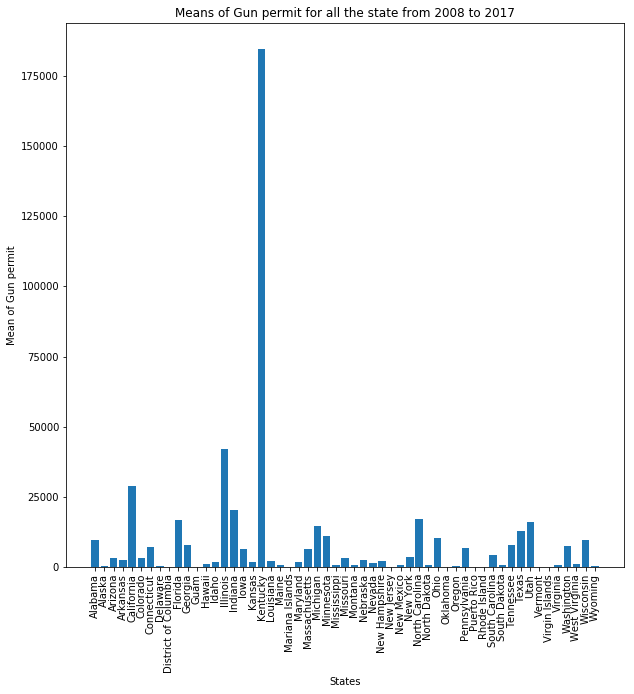

In [5]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
#redeclear i value
i=0
# create a empty array
state_mean= [];
# use while loop to calcualte the mean for all the state
while i < 55:
    test_state=list_state[i]
    state_calculate=df[df.state==test_state].permit.mean()
    state_mean.append(state_calculate)
    i=i+1
# round down the decimal point
state_mean=np.around(state_mean, decimals=0)
# Create a data frame for joint the data
dataset = pd.DataFrame({'state': list_state, 'state_mean': state_mean}, columns=['state', 'state_mean'])
plt.subplots(figsize=(10, 10))
plt.bar(list_state, state_mean)
# naming the title and axis
plt.title('Means of Gun permit for all the state from 2008 to 2017')
plt.xlabel('States')
plt.ylabel('Mean of Gun permit')
# rotating the x-axis 90 degree
plt.xticks(rotation=90)
print('Base on the observation of the graph, Kentucky has the highest overall gun registrations')

### Research Question 2  (Handgun and Long Gun Trend)

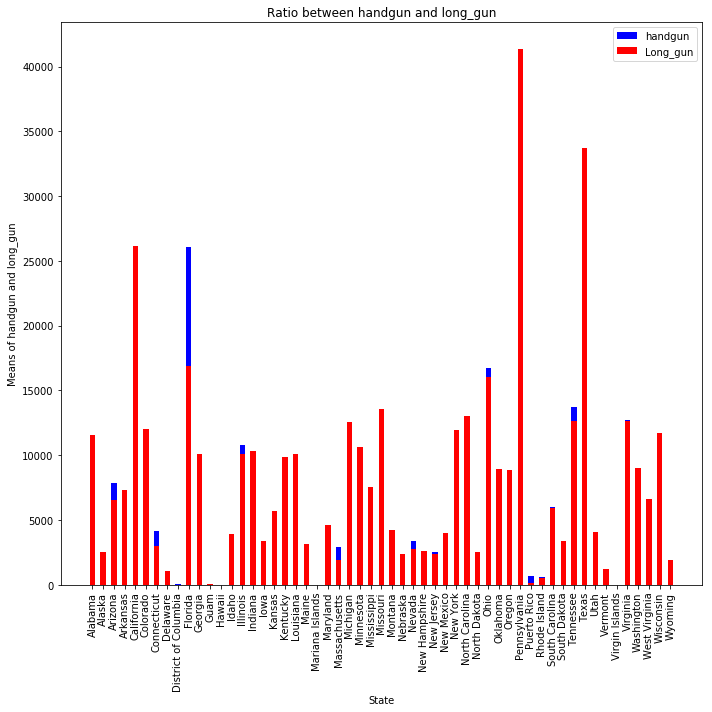

In [6]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
# redeclear i
i=0
# Create array for hand_gun and long_gun
mean_handgun=[];
mean_longgun=[];
# use while loop to calcualte the means of hand gun and long gun for all the state
while i < 55:
    test_state=list_state[i]
    handgun_cal=df[df.state==test_state].handgun.mean()
    mean_handgun.append(handgun_cal)
    longgun_cal=df[df.state==test_state].long_gun.mean()
    mean_longgun.append(longgun_cal)
    i=i+1
#round the calcualtion
mean_handgun=np.around(mean_handgun, decimals=0)
mean_longgun=np.around(mean_longgun, decimals=0)
# plot section
plt.subplots(figsize=(10, 10))
# declear number of x-axis
index = np.arange(55)
bar_width = 0.5
opacity = 1
# plot two y-axis
y_axis1 = plt.bar(index, mean_handgun, bar_width, alpha=opacity, color='b', label='handgun')
y_axis2 = plt.bar(index, mean_longgun, bar_width, alpha=opacity, color='r', label='Long_gun')
# naming the title adn axis
plt.xlabel('State')
plt.ylabel('Means of handgun and long_gun')
plt.title('Ratio between handgun and long_gun')
# rotate the x-axis 90 degree
plt.xticks(rotation=90)
plt.xticks(index, list_state)
plt.legend()
plt.tight_layout()
#plot the graph
plt.show()

<a id='conclusions'></a>
## Conclusions

For the analysis part, I only provide visualization of the calculation and comparison for the mean. The first graph contain the mean caulation of permit for each individual state from year 1998 to 2017. The first graph demonstrate the state Kentucky had significant amount of mean compare to the other state. Base on the first graph, I can conclude that state Kentucky had the highest amount of gun registration/permit from 1998 to 2017. The second graph demonstrate the ratio between handgun and long gun for each state. From the second garph, we can see the amount of red color bar is more than the blue bar. base on my observation, I can conclude that long gun is more popular than hand gun. Overall, there are more facts we could explor from the data.
## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [10]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0